Kenneth Putra Abadi

### Research question/interests
### Main Research Question, Comparing correlations between various variables of smokers and non-smokers 
## Sub-Q, Correlation between BMI and medical costs between smokers and non-smokers
Using a Pair plot to find visualize the correlation between Charges and BMI between smokers and non-smokers.
## Sub-Q, Does the region in which people live in affect the number of smokers within a population? If so how does this affect BMI and Charges as well
Using Bar graphs, where the x axis represents each of the different regions and also if they are a smoker or not. Using the y axis to represent BMI, Medical Charges and Number of people who smoke/do not smoke

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from typing import TYPE_CHECKING
if TYPE_CHECKING:
    from .code import project_functions3
else:
    import sys
    sys.path.append("./code")
    import project_functions3
df = project_functions3.load1("../data/raw/medical_expense.csv")
df1 = project_functions3.load2("../data/raw/medical_expense.csv")
df2 = project_functions3.load3("../data/raw/medical_expense.csv")

### Correlation between BMI and Medical Costs between Smokers and non-smokers

Text(0.5, 1.0, 'BMI vs Charges for smokers')

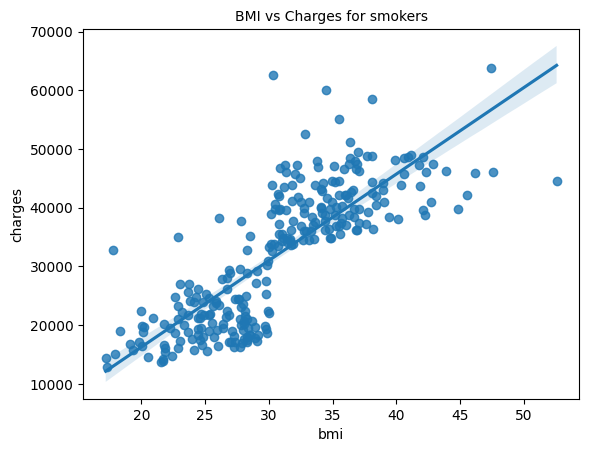

In [19]:
smoke = project_functions3.smoke(df)
plot1 = sns.regplot(data = smoke,x = 'bmi', y = 'charges')
plot1.set_title("BMI vs Charges for smokers", size = 10)

Text(0.5, 1.0, 'BMI vs Charges for Non-smokers')

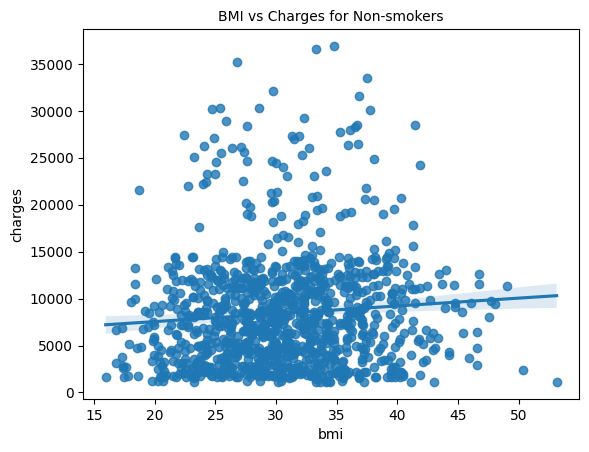

In [17]:
nosmoke = project_functions3.nosmoke(df)
plot2 = sns.regplot(data = nosmoke,x = 'bmi', y = 'charges')
plot2.set_title("BMI vs Charges for Non-smokers", size = 10)

### Does Region affect BMI and Charges? 

[Text(0, 0, '13406.4'),
 Text(0, 0, '12417.6'),
 Text(0, 0, '14735.4'),
 Text(0, 0, '12346.9')]

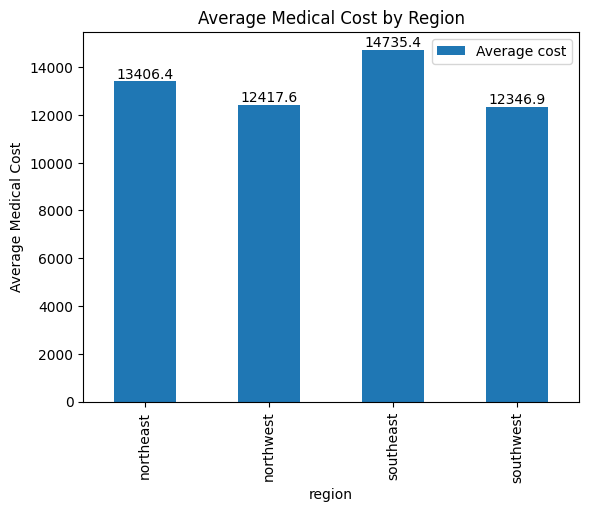

In [22]:
charge = project_functions3.clean1(df2)
ax2 = charge.plot.bar(x = 'region', title = "Average Medical Cost by Region")
ax2.set_ylabel("Average Medical Cost")
ax2.bar_label(ax2.containers[0])

[Text(0, 0, '29.1735'),
 Text(0, 0, '29.1998'),
 Text(0, 0, '33.356'),
 Text(0, 0, '30.5966')]

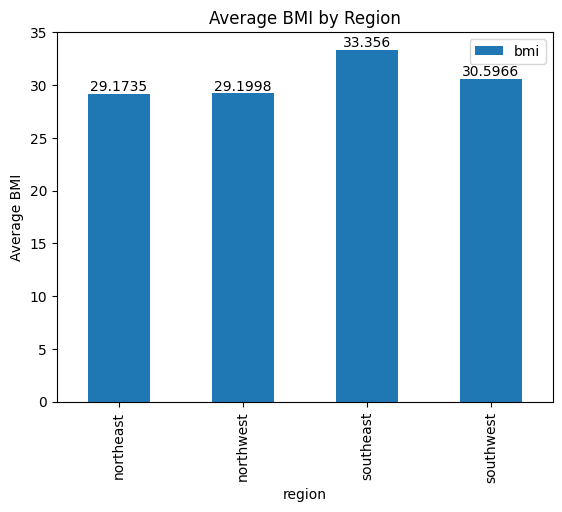

In [23]:
bmi = project_functions3.clean2(df2)
ax1 = bmi.plot.bar(x = 'region', title = 'Average BMI by Region')
ax1.set_ylabel("Average BMI")
ax1.bar_label(ax1.containers[0])

### Which region has a higher percentage of smokers? Does this highly affect the average BMI and Charges?

Text(0, 0.5, 'Count')

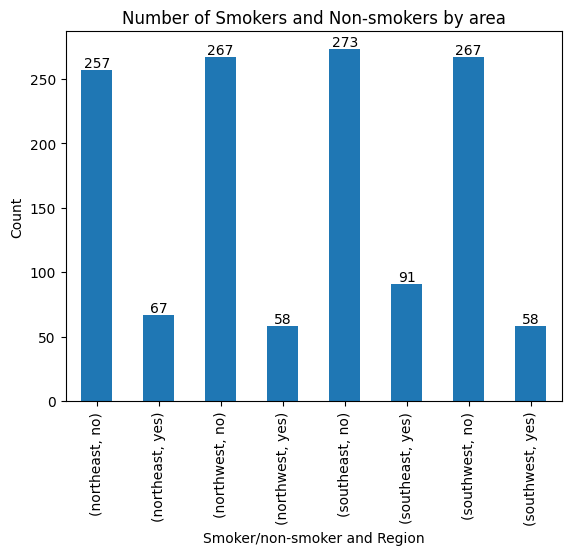

In [7]:
ax = df1.plot.bar(title = "Number of Smokers and Non-smokers by area")
ax.bar_label(ax.containers[0])
ax.set_xlabel("Smoker/non-smoker and Region")
ax.set_ylabel("Count")

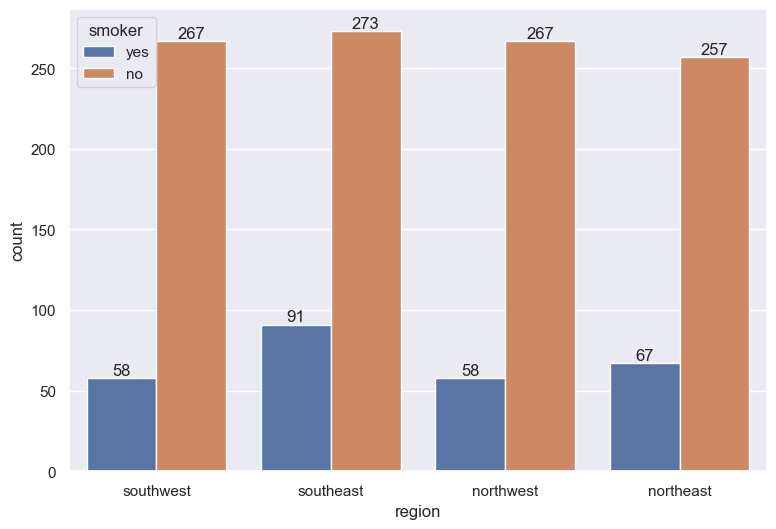

In [34]:
sns.set(rc={'figure.figsize':(9,6)})
plot3 = sns.countplot(data = df,x = 'region', hue = 'smoker')
for container in plot3.containers:
    plot3.bar_label(container)


Text(0.5, 1.0, "BMI of each region's smokers and non-smokers")

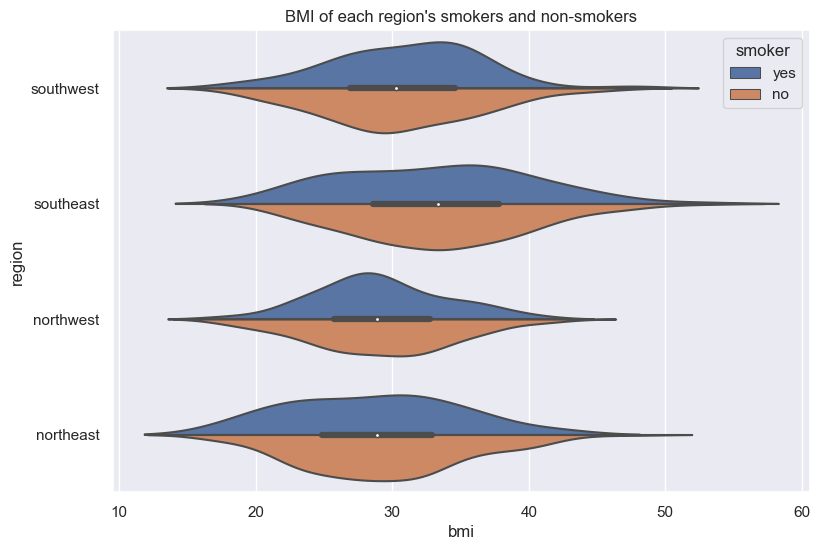

In [35]:
plot4 =  sns.violinplot(data=df, x='bmi', y='region', hue='smoker', split=True)
plot4.set_title("BMI of each region's smokers and non-smokers")

Text(0.5, 1.0, "BMI of each region's smokers and non-smokers")

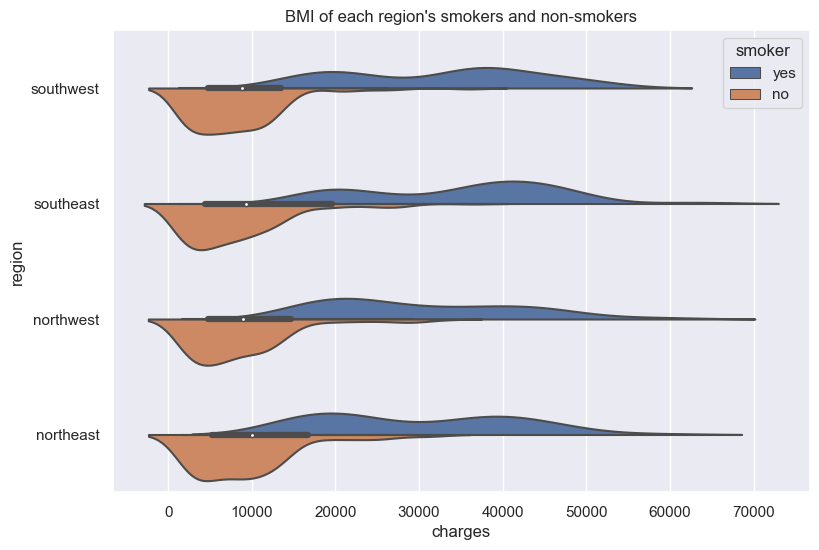

In [36]:
plot5 =  sns.violinplot(data=df, x='charges', y='region', hue='smoker', split=True)
plot5.set_title("BMI of each region's smokers and non-smokers")